# Downloading

In [1]:
using Downloads
using SHA

mkpath("tmp")

if !isfile("tmp/housing.data")
    Downloads.download("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", "tmp/housing.data")
end

open("tmp/housing.data") do f
    @assert(sha1(f) == [0xad, 0xfa, 0x6b, 0x6d, 0xca,
                        0x24, 0xa6, 0x3f, 0xe1, 0x66,
                        0xa9, 0xe7, 0xfa, 0x01, 0xce,
                        0xe4, 0x33, 0x58, 0x57, 0xd1])
end

if !isfile("tmp/housing.names")
    Downloads.download("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names", "tmp/housing.names")
end

# Loading

In [2]:
using DelimitedFiles
using DataFrames

data = readdlm("tmp/housing.data", Float64)
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
dataframe = DataFrame(data, names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0
6,0.02985,0.0,2.18,0.0,0.458,6.43,58.7,6.0622,3.0
7,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0
8,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0
9,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0


In [3]:
describe(dataframe)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,CRIM,3.61352,0.00632,0.25651,88.9762,0,Float64
2,ZN,11.3636,0.0,0.0,100.0,0,Float64
3,INDUS,11.1368,0.46,9.69,27.74,0,Float64
4,CHAS,0.06917,0.0,0.0,1.0,0,Float64
5,NOX,0.554695,0.385,0.538,0.871,0,Float64
6,RM,6.28463,3.561,6.2085,8.78,0,Float64
7,AGE,68.5749,2.9,77.5,100.0,0,Float64
8,DIS,3.79504,1.1296,3.20745,12.1265,0,Float64
9,RAD,9.54941,1.0,5.0,24.0,0,Float64


In [4]:
const nominal = ["CHAS", "RAD"]
const continuous = ["CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

12-element Vector{String}:
 "CRIM"
 "ZN"
 "INDUS"
 "NOX"
 "RM"
 "AGE"
 "DIS"
 "TAX"
 "PTRATIO"
 "B"
 "LSTAT"
 "MEDV"

In [5]:
combine(groupby(dataframe, :CHAS), nrow)

,CHAS,nrow
,Float64,Int64
1,0.0,471
2,1.0,35


In [6]:
combine(groupby(dataframe, :RAD), nrow)

,RAD,nrow
,Float64,Int64
1,1.0,20
2,2.0,24
3,3.0,38
4,4.0,110
5,5.0,115
6,6.0,26
7,7.0,17
8,8.0,24
9,24.0,132


In [8]:
using Plots

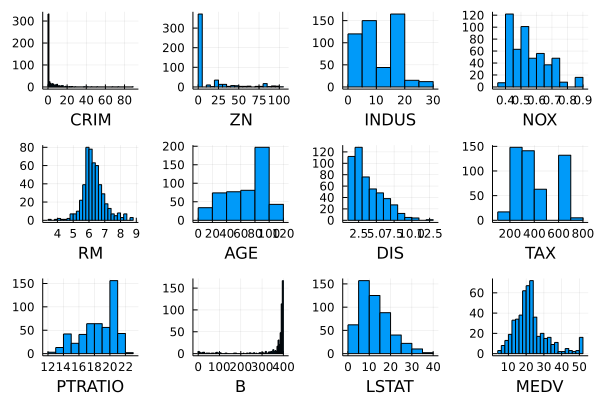

In [9]:
plots = [histogram(dataframe[!, name], xlabel=name, label=nothing) for name in continuous]
plot(plots...)

In [10]:
sort!(combine(groupby(dataframe, :MEDV), nrow), [:nrow], rev=true)

,MEDV,nrow
,Float64,Int64
1,50.0,16
2,25.0,8
3,21.7,7
4,23.1,7
5,22.0,7
6,19.4,6
7,20.6,6
8,19.6,5
9,15.6,5


In [11]:
dataframe2 = filter(row -> row.MEDV != 50, dataframe)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0
6,0.02985,0.0,2.18,0.0,0.458,6.43,58.7,6.0622,3.0
7,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0
8,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0
9,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0


In [12]:
using StatsBase

In [13]:
corr_mat = [corkendall(dataframe2[!, continuous[i]], dataframe2[!, continuous[j]]) for i in 1:length(continuous), j in 1:length(continuous)]

12×12 Matrix{Float64}:
  1.0       -0.458266   0.520867  …  -0.255792    0.483386  -0.438928
 -0.458266   1.0       -0.530466      0.121932   -0.399438   0.3565
  0.520867  -0.530466   1.0          -0.185451    0.493072  -0.448465
  0.594802  -0.514629   0.616625     -0.193448    0.479634  -0.428623
 -0.218774   0.279787  -0.299508      0.0382782  -0.455255   0.471074
  0.489837  -0.424882   0.483657  …  -0.145344    0.522331  -0.427413
 -0.5359     0.484681  -0.57237       0.157373   -0.452619   0.360628
  0.535601  -0.273946   0.474513     -0.237354    0.402941  -0.440709
  0.316977  -0.357918   0.341488     -0.0448801   0.32111   -0.396202
 -0.255792   0.121932  -0.185451      1.0        -0.163366   0.152093
  0.483386  -0.399438   0.493072  …  -0.163366    1.0       -0.658586
 -0.438928   0.3565    -0.448465      0.152093   -0.658586   1.0

In [14]:
continuous[end]

"MEDV"

In [15]:
perm = sortperm(corr_mat[:, end])

12-element Vector{Int64}:
 11
  3
  8
  1
  4
  6
  9
 10
  2
  7
  5
 12

In [16]:
corr_mat_sorted = corr_mat[perm, perm]

12×12 Matrix{Float64}:
  1.0        0.493072   0.402941  …  -0.452619  -0.455255   -0.658586
  0.493072   1.0        0.474513     -0.57237   -0.299508   -0.448465
  0.402941   0.474513   1.0          -0.375081  -0.185187   -0.440709
  0.483386   0.520867   0.535601     -0.5359    -0.218774   -0.438928
  0.479634   0.616625   0.444464     -0.685598  -0.224779   -0.428623
  0.522331   0.483657   0.349475  …  -0.606725  -0.19728    -0.427413
  0.32111    0.341488   0.280815     -0.233032  -0.196914   -0.396202
 -0.163366  -0.185451  -0.237354      0.157373   0.0382782   0.152093
 -0.399438  -0.530466  -0.273946      0.484681   0.279787    0.3565
 -0.452619  -0.57237   -0.375081      1.0        0.197309    0.360628
 -0.455255  -0.299508  -0.185187  …   0.197309   1.0         0.471074
 -0.658586  -0.448465  -0.440709      0.360628   0.471074    1.0

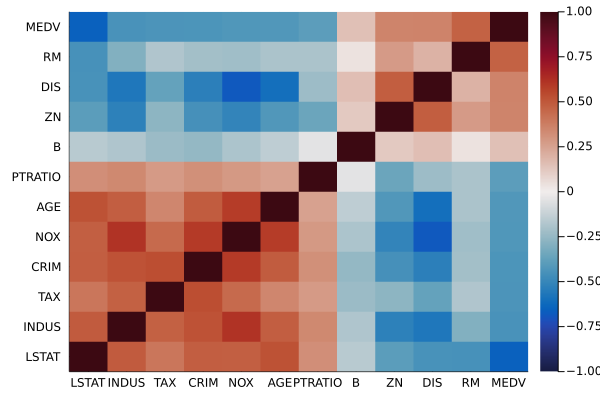

In [17]:
heatmap(corr_mat_sorted, clim=(-1, 1), xticks=(1:length(continuous), continuous[perm]), yticks=(1:length(continuous), continuous[perm]), c=:balance)

In [18]:
corr_frame = DataFrame(name=continuous[perm], corr=corr_mat_sorted[:, end])

,name,corr
,String,Float64
1,LSTAT,-0.658586
2,INDUS,-0.448465
3,TAX,-0.440709
4,CRIM,-0.438928
5,NOX,-0.428623
6,AGE,-0.427413
7,PTRATIO,-0.396202
8,B,0.152093
9,ZN,0.3565


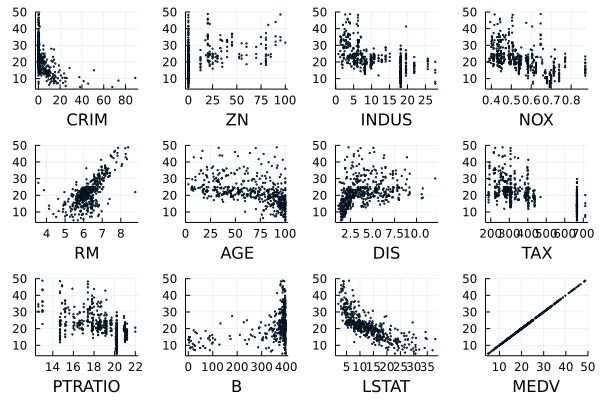

In [19]:
plots = [scatter(dataframe2[!, name], dataframe2.MEDV, xlabel=name, label=nothing, markersize=1) for name in continuous]
plot(plots...)

In [20]:
using LsqFit

In [21]:
fit(frame, name) = curve_fit((x, p)->p[1] .+ x .* p[2], frame[!, name], frame.MEDV, [0.0, 0.0])

fit (generic function with 1 method)

In [22]:
fits = [fit(dataframe2, continuous[i]).param for i in 1:length(continuous)]

12-element Vector{Vector{Float64}}:
 [23.11469718419582, -0.4058964581378227]
 [20.087931822288947, 0.13930457407944807]
 [29.324389563585886, -0.6918359005254092]
 [41.23093088370834, -35.35044704815307]
 [-30.00512012108862, 8.268557318559134]
 [31.034624535542676, -0.13765153235124544]
 [16.364093744281845, 1.3748334358758347]
 [32.5661951263172, -0.02678976001468294]
 [57.43256393856026, -1.9328642317069828]
 [10.609754627277578, 0.030984951253905654]
 [32.54041037795966, -0.8437383775538551]
 [7.50442353807282e-14, 0.9999999999999968]

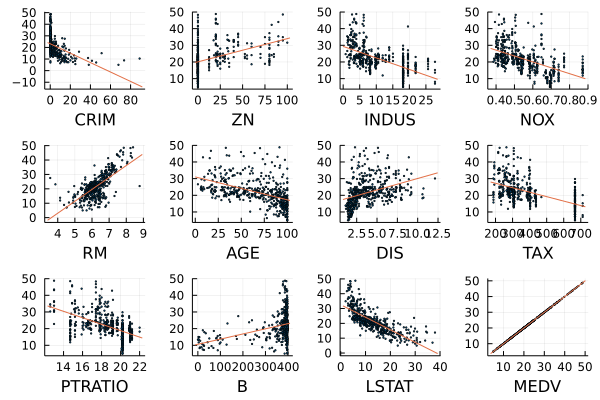

In [23]:
for i in 1:length(continuous)
    p = plots[i]
    fit_res = fits[i]
    xmin, xmax = xlims(p)
    plotx = range(xmin, xmax, length=3)
    plot!(p, plotx, fit_res[1] .+ plotx .* fit_res[2], label=nothing)
end
plot(plots...)

In [24]:
dataframe3 = select(dataframe2, Not(:B))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0
6,0.02985,0.0,2.18,0.0,0.458,6.43,58.7,6.0622,3.0
7,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0
8,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0
9,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0


In [25]:
dataframe4 = transform(dataframe3, :ZN => ByRow(x->x == 0 ? 0.0 : 1.0) => :ZN,
                       :CRIM => ByRow(log) => :CRIM,
                       :DIS => ByRow(log) => :DIS)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-5.06404,1.0,2.31,0.0,0.538,6.575,65.2,1.40854,1.0
2,-3.6005,0.0,7.07,0.0,0.469,6.421,78.9,1.60284,2.0
3,-3.60123,0.0,7.07,0.0,0.469,7.185,61.1,1.60284,2.0
4,-3.43052,0.0,2.18,0.0,0.458,6.998,45.8,1.80207,3.0
5,-2.67292,0.0,2.18,0.0,0.458,7.147,54.2,1.80207,3.0
6,-3.51157,0.0,2.18,0.0,0.458,6.43,58.7,1.80207,3.0
7,-2.42713,1.0,7.87,0.0,0.524,6.012,66.6,1.71569,5.0
8,-1.93413,1.0,7.87,0.0,0.524,6.172,96.1,1.78348,5.0
9,-1.55476,1.0,7.87,0.0,0.524,5.631,100.0,1.80535,5.0


In [26]:
mean(dataframe4.MEDV)

21.635918367346935

In [27]:
using Bootstrap

In [28]:
function confint90(data)
    bs = bootstrap(mean, data, BalancedSampling(1000))
    return confint(bs, BasicConfInt(0.9))[1]
end

confint90 (generic function with 1 method)

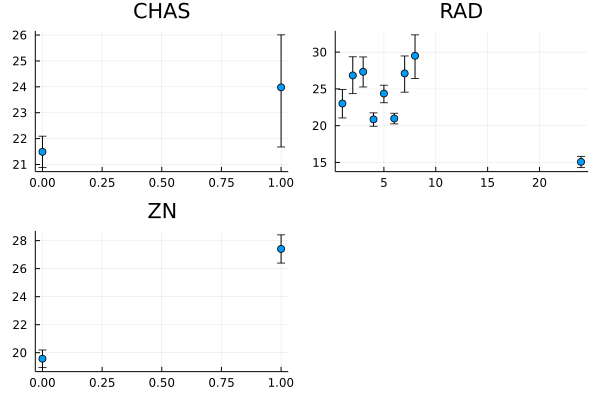

In [29]:
function plot_confint90_col(df, name)
    xs = sort!(collect(Set(df[!, name])))
    ys = Float64[]
    yerr₋ = Float64[]
    yerr₊ = Float64[]
    df = select(df, ["MEDV", name])
    for x in xs
        df2 = filter(row->row[name] == x, df)
        (y, y₋, y₊) = confint90(df2.MEDV)
        push!(ys, y)
        push!(yerr₋, y - y₋)
        push!(yerr₊, y₊ - y)
    end
    scatter(xs, ys, label=nothing, title=name, yerror=(yerr₋, yerr₊))
end
plot(plot_confint90_col(dataframe4, "CHAS"), plot_confint90_col(dataframe4, "RAD"), plot_confint90_col(dataframe4, "ZN"))

In [30]:
dataframe5 = select(dataframe4, Not(:RAD))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-5.06404,1.0,2.31,0.0,0.538,6.575,65.2,1.40854,296.0
2,-3.6005,0.0,7.07,0.0,0.469,6.421,78.9,1.60284,242.0
3,-3.60123,0.0,7.07,0.0,0.469,7.185,61.1,1.60284,242.0
4,-3.43052,0.0,2.18,0.0,0.458,6.998,45.8,1.80207,222.0
5,-2.67292,0.0,2.18,0.0,0.458,7.147,54.2,1.80207,222.0
6,-3.51157,0.0,2.18,0.0,0.458,6.43,58.7,1.80207,222.0
7,-2.42713,1.0,7.87,0.0,0.524,6.012,66.6,1.71569,311.0
8,-1.93413,1.0,7.87,0.0,0.524,6.172,96.1,1.78348,311.0
9,-1.55476,1.0,7.87,0.0,0.524,5.631,100.0,1.80535,311.0


In [31]:
using Arrow

In [32]:
Arrow.write("final.arrow", dataframe5)

"final.arrow"